# Hyper parameters

In [330]:
DAYS_FUTURE = 50
DAYS_PAST = 50

HP_UNITS = 200
HP_LAYERS = 3

TRAIN_START = "2015-01-01"
TRAIN_END = "2020-01-01"

TEST_START = "2020-01-01"
TEST_END = "2021-01-01"

HP_DROPOUT = 0.4
HP_LR = 0.001
HP_BATCH_SIZE = 2048
HP_EPOCHS = 500

labels = ['next1', 'next2', 'next3']

SPREAD = 0.00000

INIT_DEPOSIT = 1000


In [331]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline


# Get Data

In [332]:
import quandl as q 

In [333]:
q.ApiConfig.api_key = '11sy5SMsFERx_YypjsMi'

In [334]:
data = q.get('BITFINEX/BTCUSD') 

In [335]:
data

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.900000,452.00,504.23500,505.000000,503.5000,504.97,21013.584774
2014-04-16,547.000000,495.00,537.50000,538.000000,537.0000,538.00,29633.358705
2014-04-17,538.500000,486.10,507.02000,508.000000,506.0400,508.00,20709.783819
2014-04-18,509.000000,474.25,483.77000,482.750000,482.7500,484.79,10458.045243
2014-04-19,513.989900,473.83,505.01065,507.499900,502.5313,507.49,8963.618369
...,...,...,...,...,...,...,...
2021-10-28,62444.000000,57606.00,60599.50000,60600.000000,60599.0000,60600.00,7949.438417
2021-10-29,62980.000000,60188.00,62292.50000,62295.000000,62292.0000,62293.00,4041.750450
2021-10-30,62409.000000,60755.00,61407.50000,61408.000000,61407.0000,61408.00,2185.606697


<AxesSubplot:xlabel='Date'>

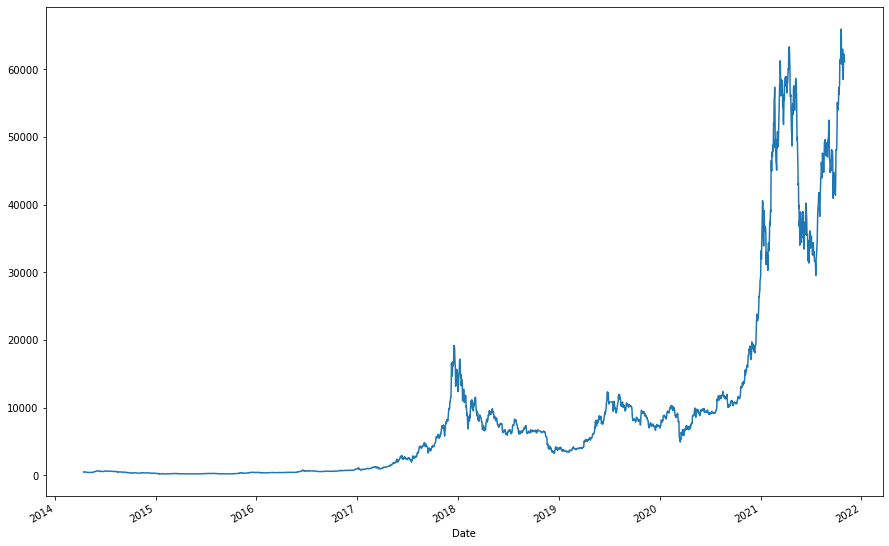

In [336]:
# show candles
data['Last'].plot(figsize=(15, 10))


# Create features

In [337]:
for i in range(1, DAYS_PAST):
    data['prev' + str(i)] = np.log(data['Last'] / data['Last'].shift(i))


In [338]:
for i in range(1, DAYS_FUTURE):
    data['next' + str(i)] = np.log(data['Last'] / data['Last'].shift(-i))


In [339]:
data

,High,Low,Mid,Last,Bid,Ask,Volume,prev1,prev2,prev3,...,next40,next41,next42,next43,next44,next45,next46,next47,next48,next49
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-15,513.900000,452.00,504.23500,505.000000,503.5000,504.97,21013.584774,NaN,NaN,NaN,...,-0.133630,-0.126886,-0.125419,-0.213369,-0.213193,-0.246241,-0.275153,-0.244692,-0.271764,-0.256253
2014-04-16,547.000000,495.00,537.50000,538.000000,537.0000,538.00,29633.358705,0.063300,NaN,NaN,...,-0.063585,-0.062119,-0.150069,-0.149893,-0.182941,-0.211853,-0.181392,-0.208464,-0.192953,-0.199369
2014-04-17,538.500000,486.10,507.02000,508.000000,506.0400,508.00,20709.783819,-0.057377,0.005923,NaN,...,-0.119496,-0.207446,-0.207270,-0.240318,-0.269230,-0.238769,-0.265841,-0.250330,-0.256746,-0.258480
2014-04-18,509.000000,474.25,483.77000,482.750000,482.7500,484.79,10458.045243,-0.050983,-0.108360,-0.045060,...,-0.258429,-0.258253,-0.291301,-0.320213,-0.289751,-0.316823,-0.301312,-0.307728,-0.309463,-0.298227
2014-04-19,513.989900,473.83,505.01065,507.499900,502.5313,507.49,8963.618369,0.049998,-0.000985,-0.058362,...,-0.208255,-0.241303,-0.270215,-0.239754,-0.266826,-0.251315,-0.257731,-0.259465,-0.248229,-0.258401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,62444.000000,57606.00,60599.50000,60600.000000,60599.0000,60600.00,7949.438417,0.034978,0.007653,-0.038649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-29,62980.000000,60188.00,62292.50000,62295.000000,62292.0000,62293.00,4041.750450,0.027586,0.062564,0.035239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-30,62409.000000,60755.00,61407.50000,61408.000000,61407.0000,61408.00,2185.606697,-0.014341,0.013245,0.048223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model create

In [340]:
import tensorflow as tf


In [341]:
# create an MLP model
def create_model(input_shape, output_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=HP_UNITS,
              activation='relu', input_shape=input_shape))
    for a in range(HP_LAYERS):
        model.add(tf.keras.layers.Dense(units=HP_UNITS, activation='relu'))
        if a != HP_LAYERS:
            model.add(tf.keras.layers.Dropout(HP_DROPOUT))

    model.add(tf.keras.layers.Dense(units=output_shape, activation='linear'))
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(
        HP_LR), metrics=["accuracy"])
    return model


# Split to train set and test set

In [342]:
X_train = data.loc[(data.index >= TRAIN_START) &
                   (data.index <= TRAIN_END)]
X_test = data.loc[(data.index >= TEST_START) &
                  (data.index <= TEST_END)]


In [343]:
X_test.head()

,High,Low,Mid,Last,Bid,Ask,Volume,prev1,prev2,prev3,...,next40,next41,next42,next43,next44,next45,next46,next47,next48,next49
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7285.1,7185.4,7213.05,7213.1,7213.0,7213.1,2045.343527,0.000319,-0.006701,-0.027728,...,-0.314705,-0.351476,-0.359057,-0.346881,-0.358185,-0.315625,-0.325686,-0.294679,-0.345261,-0.287290
2020-01-02,7225.8,6963.0,6989.45,6989.5,6989.4,6989.5,4848.085330,-0.031490,-0.031171,-0.038191,...,-0.382966,-0.390546,-0.378371,-0.389675,-0.347115,-0.357176,-0.326169,-0.376750,-0.318780,-0.318225
2020-01-03,7444.9,6909.3,7356.95,7356.9,7356.9,7357.0,6653.414357,0.051230,0.019740,0.020059,...,-0.339317,-0.327141,-0.338445,-0.295885,-0.305946,-0.274940,-0.325521,-0.267551,-0.266995,-0.276487
2020-01-04,7422.0,7297.3,7373.05,7373.0,7373.0,7373.1,4264.090728,0.002186,0.053416,0.021926,...,-0.324955,-0.336259,-0.293699,-0.303760,-0.272754,-0.323335,-0.265364,-0.264809,-0.274301,-0.270241
2020-01-05,7509.9,7315.8,7346.65,7344.9,7346.6,7346.7,4415.509410,-0.003818,-0.001632,0.049597,...,-0.340078,-0.297518,-0.307578,-0.276572,-0.327153,-0.269183,-0.268628,-0.278120,-0.274060,-0.306857


In [344]:

y_train = X_train[labels].to_numpy()  # X - source, y - target
y_test = X_test[labels].to_numpy()


In [345]:
columns = []
for i in range(1, DAYS_PAST):
    columns.append('prev' + str(i))


In [346]:
X_train = X_train[columns].to_numpy()
X_test_times = X_test.index
X_test_price = X_test['Last'].to_numpy()
X_test = X_test[columns].to_numpy()


In [347]:
train_ds = tf.data.Dataset.from_tensor_slices(((X_train), y_train))
train_ds = train_ds.take(len(X_train))
test_ds = tf.data.Dataset.from_tensor_slices(((X_test), y_test))
test_ds = test_ds.take(len(X_test))
train_ds = train_ds.batch(HP_BATCH_SIZE, False).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(len(X_test), False).prefetch(tf.data.AUTOTUNE)


In [348]:
model = create_model(X_test.shape, len(y_test[0]))


# Training model

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=50)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=HP_BATCH_SIZE,
    # callbacks=[callback_early],
    verbose=1, epochs=HP_EPOCHS)


In [ ]:
# helper functions to plot accuracy and loss
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


In [ ]:
plt.figure(figsize=(15, 10))
plot_accuracy(history)
plt.figure(figsize=(15, 10))
plot_loss(history)


# Trains results

In [ ]:
train_prediction = model.predict(X_train)


In [ ]:

from sklearn.metrics import mean_absolute_error

train_mse = mean_absolute_error(y_train, train_prediction)
round(train_mse, 5)


In [ ]:
for i in range(len(labels)):
    print (labels[i],   "{:8.5f}".format(mean_absolute_error(y_train[:,i], train_prediction[:,i])))  

In [ ]:
best = 0

for j in range(len(labels)):
    c = 0
    n = 0
    for i in range(len(y_train)):
        if abs(train_prediction[i, j]) < 0.00001:
            continue
        n = n+1
        if (np.sign(y_train[i, j]) == np.sign(train_prediction[i, j])):
            c = c+1
    print(labels[j], round(c/n, 3))
    if c/n > best:
        best = c/n
        best_label = j

labels[best_label]


In [ ]:
import seaborn as sns

sns.histplot(data=train_prediction[:, 2])


In [ ]:
fig = plt.figure(figsize=(10,15))

for i in range(min(len(labels),12)):
    fig.add_subplot(4, 3, i+1)
    plt.title(labels[i])

    plt.xlim(-0.1, 0.1)
    plt.ylim(-0.2, 0.2)
    plt.scatter(train_prediction[:, i], y_train[:, i], alpha=0.3)


# Test results

In [ ]:
test_prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

test_mse = mean_absolute_error(y_test, test_prediction)
round(train_mse,5)

In [ ]:
for i in range(len(labels)):
    print (labels[i],   "{:8.5f}".format(mean_absolute_error(y_test[:,i], test_prediction[:,i])))  

In [ ]:
best = 0

for j in range(len(labels)):
    c = 0
    n = 0
    for i in range(len(y_test)):
        if abs(test_prediction[i, j]) < 0.00001:
            continue
        n = n+1
        if (np.sign(y_test[i, j]) == np.sign(test_prediction[i, j])):
            c = c+1
    print(labels[j], round(c/n, 3))
    if c/n > best:
        best = c/n
        best_label = j

labels[best_label]


In [ ]:
import seaborn as sns

sns.histplot(data=test_prediction[:, 2])


In [ ]:
fig = plt.figure(figsize=(10,15))

for i in range(min(len(labels),12)):
    fig.add_subplot(4, 3, i+1)
    plt.title(labels[i])
    plt.xlim(-0.1, 0.1)
    plt.ylim(-0.2, 0.2)
    plt.scatter(test_prediction[:, i], y_test[:, i], alpha=0.3)


# Backtesting

In [ ]:
summer = lambda y: sum(y)/len(labels)
test_sum = np.array([summer(y) for y in test_prediction])


In [ ]:
data = pd.DataFrame({'Datetime': X_test_times, 'distance': test_sum, 'Last': X_test_price })


In [ ]:
def run_strategy(a_data, threshold):
    ''' Backtests the trading strategy.
    '''
    data = a_data.copy().dropna()
    data['returns'] = np.log(data['Last'] / data['Last'].shift(1)).dropna()
    # buy BTC signals
    data['position'] = np.where(data['distance'] > threshold, 1, np.nan)
    # sell BTC signals
    data['position'] = np.where(data['distance'] < -threshold, -1,
                                data['position'])
    data['position'] = data['position'].ffill().fillna(0)
    data['strategy'] = data['position'].shift(1) * data['returns']
    # determine when a trade takes place
    trades = data['position'].diff().fillna(0) != 0
    # subtract transaction costs from return when trade takes place
    data['strategy'][trades] -= SPREAD
    data['buy'] = data['position'].diff().fillna(0) > 0
    data['sell'] = data['position'].diff().fillna(0) < 0
    data['creturns'] = INIT_DEPOSIT * data['returns'].cumsum().apply(np.exp)
    data['cstrategy'] = INIT_DEPOSIT * data['strategy'].cumsum().apply(np.exp)
    results = data
    # absolute performance of the strategy
    aperf = results['cstrategy'].iloc[-1]
    # base instrument performance (BTC)
    bperf = results['creturns'].iloc[-1]
    # out-/underperformance of strategy
    operf = aperf - bperf

    return round(aperf, 2), round(operf, 2), results

In [ ]:

for i in range(100):
    x,y,z = run_strategy(data, i/100)
    print(i/100, x)    